In [1]:
This fails to work on windows

%matplotlib inline

from __future__ import print_function
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import cv2
import pylab                                 
pylab.rcParams['figure.figsize'] = (10.0, 18.0)

In [2]:
# to use this, do:  pip install scikit-image

from skimage.feature import blob_dog, blob_log, blob_doh
# blobs_log = blob_log(mask, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log = blob_log(mask, threshold=.5)
print(blobs_log)

ImportError: No module named skimage.feature

In [8]:
from math import sqrt
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
print(blobs_log)

NameError: name 'blobs_log' is not defined

In [9]:
tmp = mask.copy()
tmp = cv2.cvtColor(tmp, cv2.COLOR_GRAY2RGB)
for b in blobs_log:
    b = map(int, b)
    y,x,r = b
    cv2.circle(tmp, (x,y), r, (255,0,255))
#     c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
#     print(dir(c))
#     plt.add_patch(c)
# plt.set_axis_off()
# plt.tight_layout()
plt.imshow(tmp)

NameError: name 'blobs_log' is not defined

In [10]:
tmp = mask.copy()
tmp = cv2.cvtColor(tmp, cv2.COLOR_GRAY2RGB)
blobs_dog = blob_dog(mask, threshold=.5)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
for b in blobs_dog:
    b = map(int, b)
    y,x,r = b
    cv2.circle(tmp, (x,y), r, (255,0,255))
plt.imshow(tmp)

NameError: name 'blob_dog' is not defined

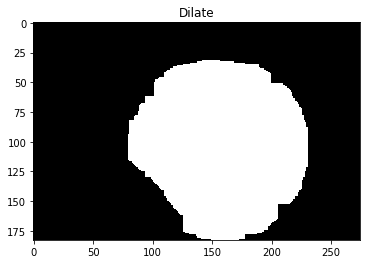

In [6]:
# close up small holes
dilate = cv2.dilate(erode, None, iterations=4)
plt.imshow(dilate, cmap='gray')
plt.title('Dilate');

mask = dilate

In [11]:
tmp = mask.copy()
tmp = cv2.cvtColor(tmp, cv2.COLOR_GRAY2RGB)
blobs_doh = blob_doh(mask, threshold=.05)
for b in blobs_doh:
    b = map(int, b)
    y,x,r = b
    cv2.circle(tmp, (x,y), r, (255,0,255))
plt.imshow(tmp);

NameError: name 'blob_doh' is not defined

In [12]:
from skimage import measure
contours = measure.find_contours(mask, 0.1)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(mask, cmap='gray')

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
# ax.set_xticks([])
# ax.set_yticks([]);
# ax.grid(True)

ImportError: No module named skimage

In [13]:
# http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops
from skimage.measure import label, regionprops

tmp = cv2.cvtColor(mask.copy(), cv2.COLOR_GRAY2RGB)

label_img = label(mask)
regions = regionprops(label_img)

for r in regions:
    print('-'*20)
    print('centroid', r.centroid)
#     print(r.bbox)
#     print('moments_hu', r.moments_hu)
    print('area', r.area)
    print('eccentricity', r.eccentricity)
    y,x = map(int, r.centroid)
    cv2.circle(tmp, (x,y), 5, (255,0,255), -1)
    cv2.rectangle(tmp, (r.bbox[1], r.bbox[0]), (r.bbox[3], r.bbox[2]), (255,0,0))
    
plt.imshow(tmp);

ImportError: No module named skimage.measure

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getitem__', '__hash__', '__init__', '__iter__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_cache_active', '_intensity_image', '_intensity_image_double', '_label_image', '_ndim', '_slice', 'area', 'bbox', 'bbox_area', 'centroid', 'convex_area', 'convex_image', 'coords', 'eccentricity', 'equivalent_diameter', 'euler_number', 'extent', 'filled_area', 'filled_image', 'image', 'inertia_tensor', 'inertia_tensor_eigvals', 'intensity_image', 'label', 'local_centroid', 'major_axis_length', 'max_intensity', 'mean_intensity', 'min_intensity', 'minor_axis_length', 'moments', 'moments_central', 'moments_hu', 'moments_normalized', 'orientation', 'perimeter', 'solidity', 'weighted_centroid', 'weighted_local_centroid', 'weighted_moments', 'weighted_moments_central', 'weighted_moments_hu', 'weighted_moments_normalized']